In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('processed_data2.csv')

# Display the first few rows of the dataset
data.head()


,text,labels,cleaned_comment
0,<user> thanks for showing up for our appointme...,1,user thanks showing appointment today
1,haha . # lol,1,haha lol
2,i love waiting <num> min for a cab - such shor...,1,love waiting num min cab shortage user please ...
3,22 super funny quotes # funnyquotes # funnysa...,1,22 super funny quote funnyquotes funnysayings ...
4,goog morning # sorrynotsorry # morning,1,goog morning sorrynotsorry morning


## Encoding the lables

Label Encoding: This step converts categorical labels into integer values. One-Hot Encoding: The labels are further transformed into a binary matrix format for multi-class classification.

In [5]:
# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['labels'])

# Convert labels to categorical one-hot encoding
labels = to_categorical(labels)



Fill NaN Values: Replaces missing values in the 'cleaned_comment' column with an empty string to avoid issues during vectorization. TF-IDF Vectorization: Transforms the text data into numerical features based on term frequency-inverse document frequency, limited to the top 5000 features.

In [22]:
# Fill NaN values with an empty string
data['cleaned_comment'] = data['cleaned_comment'].fillna('')

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
features = tfidf.fit_transform(data['cleaned_comment']).toarray()


## split the data

Train-Test Split: Splits the dataset into training and testing sets to evaluate model performance.
Display Shapes: Shows the dimensions of the training and testing sets to verify the split.

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (15568, 5000)
Testing set shape: (3893, 5000)


## Dense Neural Network Model

A dense neural network, also known as a fully connected network, is one of the simplest types of neural networks. It consists of layers where each neuron is connected to every neuron in the previous layer.

 We will create a Sequential model and add Dense layers. The first layer has 512 neurons with ReLU activation and receives input of the shape of our training data. Dropout layers are added to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
The model is compiled with the categorical crossentropy loss function (suitable for multi-class classification) and the Adam optimizer. Accuracy is used as the metric to evaluate the model.
 The model is trained using the training data for 10 epochs with a batch size of 64. Validation data is used to monitor the model's performance on unseen data during training.

In [8]:
# Build the dense model
dense_model = Sequential()
dense_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
dense_model.add(Dropout(0.5))
dense_model.add(Dense(256, activation='relu'))
dense_model.add(Dropout(0.5))
dense_model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
dense_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
dense_history = dense_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)


C:\Users\91636\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.6513 - loss: 0.6144 - val_accuracy: 0.7614 - val_loss: 0.4878
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8406 - loss: 0.3694 - val_accuracy: 0.7588 - val_loss: 0.5030
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8891 - loss: 0.2729 - val_accuracy: 0.7562 - val_loss: 0.5469
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9320 - loss: 0.1795 - val_accuracy: 0.7465 - val_loss: 0.6678
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9599 - loss: 0.1159 - val_accuracy: 0.7444 - val_loss: 0.8052
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9732 - loss: 0.0744 - val_accuracy: 0.7454 - val_loss: 0.8785
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9805 - loss: 0.0580 - val_accuracy: 0.7436 - val_loss: 0.9924
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9812 - loss: 0.0525 - val_accu

In [10]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten


## Convolutional Neural Network (CNN) Model
 CNNs are particularly powerful for capturing spatial hierarchies in data, and are widely used in image and text classification tasks.

Since CNNs expect multi-dimensional input, we need to reshape our feature data to include a single channel dimension.
X_train_cnn and X_test_cnn are reshaped to have an additional dimension.
 create a Sequential model and add layers specific to CNNs.
Applies a 1D convolution to the input data with 64 filters and a kernel size of 3, using ReLU activation.
**maxpooling** Reduces the dimensions (down-sampling) by a factor of 2.
**Flatten Layer:** Flattens the multi-dimensional output from the convolutional layers into a single vector.
**Dense Layers:** Fully connected layers with ReLU activation, followed by a Dropout layer to prevent overfitting, and an output layer with softmax activation for multi-class classification.
The model is compiled with the categorical crossentropy loss function and the Adam optimizer. Accuracy is used as the metric to evaluate the model.


In [11]:
# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test), verbose=1)


C:\Users\91636\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 171s 691ms/step - accuracy: 0.6829 - loss: 0.5880 - val_accuracy: 0.7393 - val_loss: 0.5114
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 166s 682ms/step - accuracy: 0.8164 - loss: 0.4011 - val_accuracy: 0.7426 - val_loss: 0.5230
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 166s 682ms/step - accuracy: 0.8621 - loss: 0.3225 - val_accuracy: 0.7470 - val_loss: 0.5509
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 165s 675ms/step - accuracy: 0.9023 - loss: 0.2548 - val_accuracy: 0.7449 - val_loss: 0.6246
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 164s 672ms/step - accuracy: 0.9314 - loss: 0.1907 - val_accuracy: 0.7385 - val_loss: 0.7134
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 163s 669ms/step - accuracy: 0.9529 - loss: 0.1338 - val_accuracy: 0.7367 - val_loss: 0.8388
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 178s 729ms/step - accuracy: 0.9694 - loss: 0.1004 - val_accuracy: 0.7380 - val_loss: 0.9492
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 166s 680ms/step - accuracy: 0.9672 -

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense


## LSTM

LSTMs are a type of recurrent neural network (RNN) well-suited for sequential data and are effective at capturing temporal dependencies.
 create a Sequential model and add layers specific to LSTMs.
*LSTM Layer:* Adds an LSTM layer with 100 units to capture sequential dependencies in the input data.
*Dropout Layer:* Adds a Dropout layer to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
*Dense Layer:* Adds a fully connected output layer with softmax activation for multi-class classification.


In [14]:
# Reshape data for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(1, X_train.shape[1])))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test), verbose=1)


C:\Users\91636\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5947 - loss: 0.6630 - val_accuracy: 0.7493 - val_loss: 0.5285
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8062 - loss: 0.4493 - val_accuracy: 0.7611 - val_loss: 0.4819
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8436 - loss: 0.3670 - val_accuracy: 0.7570 - val_loss: 0.4993
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8557 - loss: 0.3334 - val_accuracy: 0.7567 - val_loss: 0.5255
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8671 - loss: 0.3147 - val_accuracy: 0.7529 - val_loss: 0.5504
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8706 - loss: 0.2969 - val_accuracy: 0.7521 - val_loss: 0.5789
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8854 - loss: 0.2784 - val_accuracy: 0.7490 - val_loss: 0.6063
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8814 - loss: 0.2752 - val_accu

## Evalutation the model and calculate metrix

Model Evaluation:
Evaluates the model on the test set to get the loss and accuracy.

Predictions: 
Generates predictions and calculates the predicted labels.
    
Display Labels:
Shows the first 10 actual and predicted labels for reference.
                                              
Calculate Metrics: 
Computes accuracy, precision, recall, F1 score, confusion matrix, and ROC AUC to assess the model’s performance.
    
Print Metrics: 
Outputs the computed metrics for analysis.
                    
Plot Confusion Matrix:
Visualizes the confusion matrix to show the model’s performance in terms of true positives, true negatives, false positives, and false negatives.
                    
Plot ROC Curve:
Visualizes the ROC curves for each class to show the model’s ability to distinguish between classes.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_test_true = np.argmax(y_test, axis=1)
    
    accuracy = accuracy_score(y_test_true, y_pred)
    precision = precision_score(y_test_true, y_pred, average='weighted')
    recall = recall_score(y_test_true, y_pred, average='weighted')
    f1 = f1_score(y_test_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
    
    return accuracy, precision, recall, f1, roc_auc

# Evaluate Dense Model
dense_metrics = evaluate_model(dense_model, X_test, y_test)
print("Dense Model - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}, ROC AUC: {:.4f}".format(*dense_metrics))

# Evaluate CNN Model
cnn_metrics = evaluate_model(cnn_model, X_test_cnn, y_test)
print("CNN Model - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}, ROC AUC: {:.4f}".format(*cnn_metrics))

# Evaluate LSTM Model
lstm_metrics = evaluate_model(lstm_model, X_test_lstm, y_test)
print("LSTM Model - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}, ROC AUC: {:.4f}".format(*lstm_metrics))


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Dense Model - Accuracy: 0.7444, Precision: 0.7435, Recall: 0.7444, F1 Score: 0.7426, ROC AUC: 0.8191
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step
CNN Model - Accuracy: 0.7408, Precision: 0.7398, Recall: 0.7408, F1 Score: 0.7398, ROC AUC: 0.8099
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM Model - Accuracy: 0.7442, Precision: 0.7431, Recall: 0.7442, F1 Score: 0.7428, ROC AUC: 0.8144


## Selecting and Evaluating the Best Deep Learning Model

 Determine the best model among the Dense, CNN, and LSTM models based on their accuracy. We then re-evaluate the best model for a detailed analysis, including the confusion matrix and ROC curve.


Initialization:

We initialize variables to keep track of the best model (best_model), its metrics (best_metrics), and its name (best_name).
Determining the Best Model:

We iterate through each model, compare their accuracies, and update best_model, best_metrics, and best_name accordingly.
Re-evaluation for Detailed Analysis:

Based on the best model, we prepare the test data (X_test_best) in the required format for re-evaluation.
We make predictions on the test data and convert the predicted probabilities to class labels.
We also convert the true labels from one-hot encoding to class labels.
Confusion Matrix:

We compute the confusion matrix to visualize the performance of the best model.
A confusion matrix shows the counts of actual vs. predicted classifications, which helps in understanding the model's performance in detail.
ROC Curve:

We calculate the ROC curve for each class to evaluate the model's performance.
ROC curves plot the true positive rate (sensitivity) against the false positive rate (1-specificity), providing insight into the trade-off between sensitivity and specificity for different threshold values.
The Area Under the Curve (AUC) is also computed to summarize the model's performance across all thresholds.

Best model is Dense with accuracy 0.7444
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


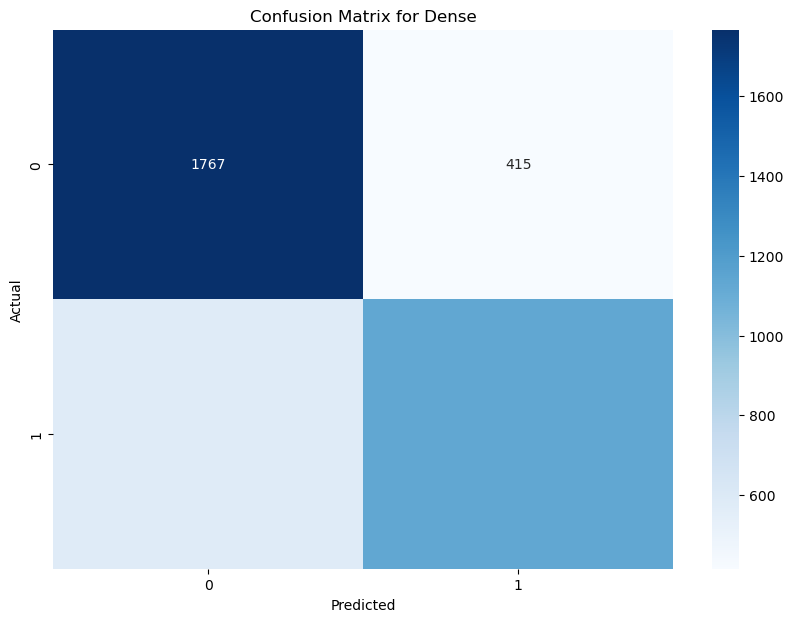

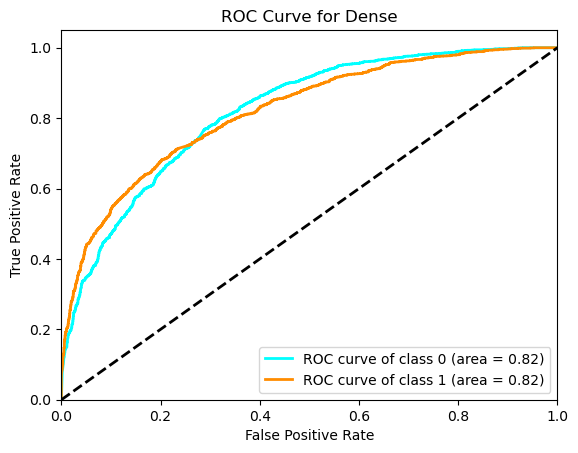

In [17]:
best_model = None
best_metrics = None
best_name = ""

# Determine the best model based on accuracy
models = [dense_model, cnn_model, lstm_model]
metrics = [dense_metrics, cnn_metrics, lstm_metrics]
names = ["Dense", "CNN", "LSTM"]

for model, metric, name in zip(models, metrics, names):
    if best_metrics is None or metric[0] > best_metrics[0]:  # Compare by accuracy
        best_model = model
        best_metrics = metric
        best_name = name

print(f"Best model is {best_name} with accuracy {best_metrics[0]:.4f}")

# Re-evaluate best model for detailed analysis
X_test_best = X_test_cnn if best_name == "CNN" else (X_test_lstm if best_name in ["LSTM", "BiLSTM"] else X_test)
y_pred_probs = best_model.predict(X_test_best)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_name}')
plt.show()

# Plot ROC Curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(y_test.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {best_name}')
plt.legend(loc="lower right")
plt.show()


## In Summary

among these three models Dense model has more accuracy so we finilized the dense model.

## Confusion Matrix for Dense Model
 1767 instances where the model correctly predicted class 0.
 415 instances where the model incorrectly predicted class 1.

## ROC Curve for Dense Model
True Positive Rate (TPR): Also known as recall or sensitivity, this measures the proportion of actual positives correctly identified.                                                      
False Positive Rate (FPR): This measures the proportion of actual negatives incorrectly identified as positives.                                                      
ROC Curve: Plots TPR against FPR at various threshold settings, showing the trade-off between sensitivity and specificity.                                                     
AUC (Area Under the Curve): Represents the degree of separability achieved by the model. AUC values close to 1 indicate a good model, while values close to 0.5 suggest a model that performs no better than random guessing.

## Observations in curve
Class 0 and Class 1 AUC Scores, Both classes have an AUC score of 0.82, indicating a fairly good performance of the dense model in distinguishing between the two classes.